# GONZAG cloud example

In [ ]:
import sys
from os import getenv
import warnings
warnings.filterwarnings("ignore")

In [2]:
from gonzag.config import *
from gonzag.io import *
from gonzag.utils import *
from gonzag.mod2sat import *
from gonzag.bilin_mapping import *
from gonzag.spectralysis import *


## Data

In [3]:
import xarray as xr
osn_url = 'https://ncsa.osn.xsede.org/Pangeo/pangeo-forge/swot_adac/eNATL60_surface_region_1'
dsmod = xr.open_zarr(osn_url, consolidated=True)

In [4]:
dsmod

<xarray.Dataset>
Dimensions:        (time_counter: 2136, x: 611, y: 763)
Coordinates:
    depth          (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e1f            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e1t            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e1u            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e1v            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e2f            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e2t            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e2u            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e2v            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    lat            (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    lon            (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    nav_lat        (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    nav_lon        (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    time_centered  (time_counter) datetime64[ns] dask.array<chunksize=(72,), meta=np.ndarray>
  * time_counter   (time_counter) datetime64[ns] 2010-02-01T00:30:00 ... 2010...
Dimensions without coordinates: x, y
Data variables:
    fmask          (y, x) int8 dask.array<chunksize=(763, 611), meta=np.ndarray>
    qt_oce         (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    somecrty       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sometauy       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sosaline       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sossheig       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sosstsst       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sowaflup       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sozocrtx       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sozotaux       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    tmask          (y, x) int8 dask.array<chunksize=(763, 611), meta=np.ndarray>
    umask          (y, x) int8 dask.array<chunksize=(763, 611), meta=np.ndarray>
    vmask          (y, x) int8 dask.array<chunksize=(763, 611), meta=np.ndarray>

In [5]:
name_ssh_mod = 'sossheig'
name_lsm_mod = 'tmask' 
l_griddist = False

In [6]:
from intake import open_catalog
cat = open_catalog("https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/ocean/altimetry.yaml")
dssat  = cat["al"].to_dask()

In [7]:
dssat

<xarray.Dataset>
Dimensions:         (time: 34340107)
Coordinates:
    latitude        (time) float64 dask.array<chunksize=(34340107,), meta=np.ndarray>
    longitude       (time) float64 dask.array<chunksize=(34340107,), meta=np.ndarray>
  * time            (time) datetime64[ns] 2013-03-14T05:44:50.445185024 ... 2...
Data variables:
    cycle           (time) int16 dask.array<chunksize=(34340107,), meta=np.ndarray>
    dac             (time) float64 dask.array<chunksize=(34340107,), meta=np.ndarray>
    lwe             (time) float64 dask.array<chunksize=(34340107,), meta=np.ndarray>
    mdt             (time) float64 dask.array<chunksize=(34340107,), meta=np.ndarray>
    ocean_tide      (time) float64 dask.array<chunksize=(34340107,), meta=np.ndarray>
    sla_filtered    (time) float64 dask.array<chunksize=(34340107,), meta=np.ndarray>
    sla_unfiltered  (time) float64 dask.array<chunksize=(34340107,), meta=np.ndarray>
    track           (time) int16 dask.array<chunksize=(34340107,), meta=np.ndarray>
Attributes:
    Conventions:               CF-1.6
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    cdm_data_type:             Swath
    comment:                   Sea surface height measured by altimeters refe...
    contact:                   servicedesk.cmems@mercator-ocean.eu
    creator_email:             servicedesk.cmems@mercator-ocean.eu
    creator_name:              CMEMS - Sea Level Thematic Assembly Center
    creator_url:               http://marine.copernicus.eu
    history:                   2019-02-20T19:39:52Z: Creation
    institution:               CLS, CNES
    keywords:                  Oceans > Ocean Topography > Sea Surface Height
    keywords_vocabulary:       NetCDF COARDS Climate and Forecast Standard Names
    license:                   http://marine.copernicus.eu/web/27-service-com...
    platform:                  Altika
    processing_level:          L3
    product_version:           2019
    project:                   COPERNICUS MARINE ENVIRONMENT MONITORING SERVI...
    references:                http://marine.copernicus.eu
    software_version:          6.2_DUACS_DT2018_baseline
    source:                    Altika measurements
    ssalto_duacs_comment:      The reference mission used for the altimeter i...
    standard_name_vocabulary:  NetCDF Climate and Forecast (CF) Metadata Conv...
    summary:                   SSALTO/DUACS Delayed-Time Level-3 sea surface ...
    title:                     DT Altika Global Ocean Along track SSALTO/DUAC...

In [8]:
name_ssh_sat='sla_unfiltered'

## Time overlap between model and satellite ?
Assume that model is less than 1 year, satellite has at least one whole year, we take the overlapping period without considering which year is this

In [9]:
    (date1,date2), (Nts,Ntm) = GetTimeOverlap( dssat , dsmod )
    print(' *** Time overlap between model and satellite in UNIX epoch time: it1, it2',date1,'--',date2)


 *** [GetTimeInfo()] Getting calendar/time info in dataset ...
   => time/record dimension is "time"
   => first and last date:  2013-03-14T05:44:50.445185024 -- 2015-03-31T22:41:36.909480960
 *** [GetTimeInfo()] Getting calendar/time info in dataset ...
   => time/record dimension is "time_counter"
   => first and last date:  2010-02-01T00:30:00.000000000 -- 2010-04-30T23:30:00.000000000

 *** Earliest/latest dates:
   => for satellite data: 2013-03-14T05:44:50.445185024 2015-03-31T22:41:36.909480960 
   => for model     data: 2010-02-01T00:30:00.000000000 2010-04-30T23:30:00.000000000 

 *** Time overlap between model and satellite in UNIX epoch time: it1, it2 2014-02-01 -- 2014-04-30


## Create object `ModelGrid` containing all the model (aka _source_) 2D+T domain grid info

In [10]:
  
    ModelGrid = ModGrid( dsmod, date1 , date2 , dsmod, name_lsm_mod, distorded_grid=False )


 *** [GetTimeVector()] reading "time_counter" in dataset ...
   => 2136 records in TOTAL!

 *** [GetModelCoor()] Read model latitude (variable is "lat", with 2 dimensions! (763, 611) 

 *** [GetModelCoor()] Read model longitude (variable is "lon", with 2 dimensions! (763, 611) 


 *** what we use to define model land-sea mask:
    => "tmask" in dataset 

 *** [GridResolution()] Based on the longitude array, the model resolution ~=  0.016657295  degrees 

 *** Skipping computation of angle distortion of the model grid! ("-D" option not invoked)...

 *** About model gridded (source) domain:
     * shape =  (763, 611)
     * horizontal resolution:  0.016657295  degrees or  1.8507920147292316  km
     * Is this a global domain w.r.t longitude:  False
       ==> this is a regional domain
       ==> working in the [0:360] frame...
     * lon_min, lon_max =  281.99 292.17
     * lat_min, lat_max =  30.01 40.01
     * should we pay attention to possible STRONG local distorsion in the grid:  Fa

In [11]:
SatelliteTrack = SatTrack( dssat, date1, date2, Np=Nts, \
                              domain_bounds=ModelGrid.domain_bounds, l_0_360=ModelGrid.l360 )

 *** [SatTrack()] Analyzing the time vector in dataset ...
 *** [GetTimeVector()] reading "time" in dataset ...
   => 4150072 records read...

 *** [GetSatCoor()] reading "latitude" in dataset ...
   => 4150072 records read...

 *** [GetSatCoor()] reading "longitude" in dataset ...
   => 4150072 records read...


 *** About satellite track (target) domain:
     * number of time records of interest for the interpolation to come:  10236
       ==> time record indices: 14883510 to 19033581, included

       separated in 87 tracks


In [12]:
Solution0 = Model2SatTrack( ModelGrid, name_ssh_mod, SatelliteTrack, name_ssh_sat, 25 )


 *** "found" distance criterion when searching for nearest point on model grid is  1.3880940110469238  km

 *** Will use zoom boxes of width of 271 points for 1st attempts of nearest-point location...


 *** Finding nearest points on source (model) grid... (rd_found_km, np_box_r = 1.3880940110469238 135 )
      +++ Treated point: 16/162 
          ==> Sat. coordinates:     30.897 289.597
          ==> Model nearest point:  30.902 289.604  ( 62 456 )
      +++ Treated point: 32/162 
          ==> Sat. coordinates:     31.822 289.341
          ==> Model nearest point:  31.817 289.349  ( 128 441 )
      +++ Treated point: 48/162 
          ==> Sat. coordinates:     32.747 289.082
          ==> Model nearest point:  32.745 289.076  ( 196 425 )
      +++ Treated point: 64/162 
          ==> Sat. coordinates:     33.671 288.818
          ==> Model nearest point:  33.673 288.818  ( 265 410 )
      +++ Treated point: 80/162 
          ==> Sat. coordinates:     35.057 288.415
          ==> Mode

In [13]:
Solution0.time

<xarray.DataArray 'time' (time: 162)>
array(['2014-03-26T10:24:54.983470080', '2014-03-26T10:24:55.963470080',
       '2014-03-26T10:24:56.943470080', '2014-03-26T10:24:57.923470080',
       '2014-03-26T10:24:58.903470080', '2014-03-26T10:24:59.883470080',
       '2014-03-26T10:25:00.863470080', '2014-03-26T10:25:01.843470080',
       '2014-03-26T10:25:02.823470080', '2014-03-26T10:25:03.803470080',
       '2014-03-26T10:25:04.783470080', '2014-03-26T10:25:05.763470080',
       '2014-03-26T10:25:06.743470080', '2014-03-26T10:25:07.723470080',
       '2014-03-26T10:25:08.703470080', '2014-03-26T10:25:09.683470080',
       '2014-03-26T10:25:10.663470080', '2014-03-26T10:25:11.643470080',
       '2014-03-26T10:25:12.623470080', '2014-03-26T10:25:13.603470080',
       '2014-03-26T10:25:14.583470080', '2014-03-26T10:25:15.563470080',
       '2014-03-26T10:25:16.543470080', '2014-03-26T10:25:17.523470080',
       '2014-03-26T10:25:18.503470080', '2014-03-26T10:25:19.483470080',
       '2014-03-26T10:25:20.463470080', '2014-03-26T10:25:21.443470080',
       '2014-03-26T10:25:22.423470080', '2014-03-26T10:25:23.403470080',
       '2014-03-26T10:25:24.383470080', '2014-03-26T10:25:25.363470080',
       '2014-03-26T10:25:26.343470080', '2014-03-26T10:25:27.323470080',
       '2014-03-26T10:25:28.303470080', '2014-03-26T10:25:29.283470080',
       '2014-03-26T10:25:30.263470080', '2014-03-26T10:25:31.243470080',
       '2014-03-26T10:25:32.223470080', '2014-03-26T10:25:33.203470080',
       '2014-03-26T10:25:34.183470080', '2014-03-26T10:25:35.163470080',
       '2014-03-26T10:25:36.143470080', '2014-03-26T10:25:37.123470080',
       '2014-03-26T10:25:38.103470080', '2014-03-26T10:25:39.083470080',
       '2014-03-26T10:25:40.063470080', '2014-03-26T10:25:41.043470080',
       '2014-03-26T10:25:42.023470080', '2014-03-26T10:25:43.003470080',
       '2014-03-26T10:25:43.983470080', '2014-03-26T10:25:44.963470080',
       '2014-03-26T10:25:45.943470080', '2014-03-26T10:25:46.923470080',
       '2014-03-26T10:25:47.903470080', '2014-03-26T10:25:48.883470080',
       '2014-03-26T10:25:49.863470080', '2014-03-26T10:25:50.843470080',
       '2014-03-26T10:25:51.823470080', '2014-03-26T10:25:52.803470080',
       '2014-03-26T10:25:53.783470080', '2014-03-26T10:25:54.763470080',
       '2014-03-26T10:25:55.743470080', '2014-03-26T10:25:56.723470080',
       '2014-03-26T10:25:57.703470080', '2014-03-26T10:25:58.683470080',
       '2014-03-26T10:25:59.663470080', '2014-03-26T10:26:00.643470080',
       '2014-03-26T10:26:01.623470080', '2014-03-26T10:26:02.603470080',
       '2014-03-26T10:26:03.583470080', '2014-03-26T10:26:06.523470080',
       '2014-03-26T10:26:07.503470080', '2014-03-26T10:26:08.483470080',
       '2014-03-26T10:26:09.463470080', '2014-03-26T10:26:10.443470080',
       '2014-03-26T10:26:11.423470080', '2014-03-26T10:26:12.403470080',
       '2014-03-26T10:26:17.303470080', '2014-03-26T10:26:20.243470080',
       '2014-03-26T10:26:21.223470080', '2014-03-26T10:26:22.203470080',
       '2014-03-26T10:26:23.183470080', '2014-03-26T10:26:24.163470080',
       '2014-03-26T10:26:25.143470080', '2014-03-26T10:26:26.123470080',
       '2014-03-26T10:26:27.103470080', '2014-03-26T10:26:28.083470080',
       '2014-03-26T10:26:32.003470080', '2014-03-26T10:26:32.983470080',
       '2014-03-26T10:26:33.963470080', '2014-03-26T10:26:34.943470080',
       '2014-03-26T10:26:35.923470080', '2014-03-26T10:26:36.903470080',
       '2014-03-26T10:26:37.883470080', '2014-03-26T10:26:38.863470080',
       '2014-03-26T10:26:39.843470080', '2014-03-26T10:26:40.823470080',
       '2014-03-26T10:26:41.803470080', '2014-03-26T10:26:42.783470080',
       '2014-03-26T10:26:43.763470080', '2014-03-26T10:26:44.743470080',
       '2014-03-26T10:26:45.723470080', '2014-03-26T10:26:46.703470080',
       '2014-03-26T10:26:47.683470080', '2014-03-26T10:26:48.663470080',
       '2014-03-26T10:26:49.643470080', '2014-03-26T10:26:50.623470080',
       '2014-03-26T1

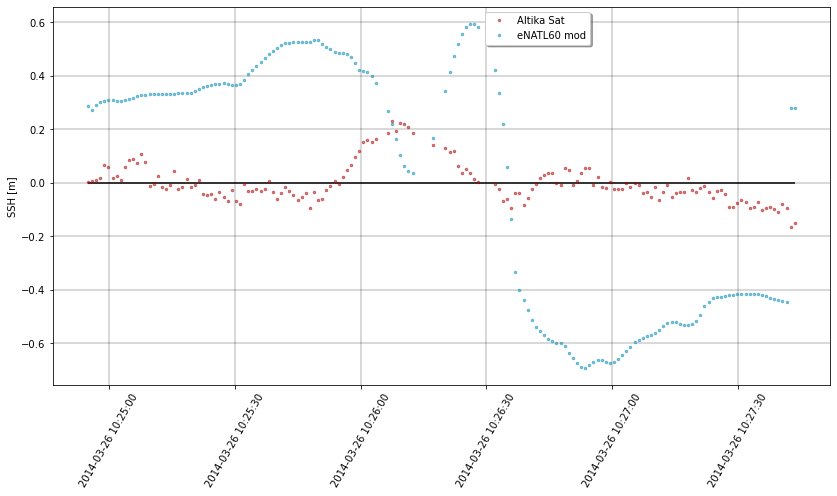

In [14]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

clr_sat = '#AD0000'
clr_mod = '#008ab8'

VT = Solution0.time ; # time from UNIX Epoch to Matlplotlib friendly...

fig = plt.figure(num = 1, figsize=(12,7), facecolor='w', edgecolor='k')
ax = plt.axes([0.07, 0.24, 0.9, 0.75])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.xticks(rotation='60')
plt.hlines(0,VT[0],VT[-1], colors='k',                   label=None,  zorder=5)
plt.plot(VT, Solution0.ssh_sat-nmp.mean(Solution0.ssh_sat), '.', color=clr_sat, markersize=5, alpha=0.5, label='Altika Sat', zorder=10)
plt.plot(VT, Solution0.ssh_mod-nmp.mean(Solution0.ssh_mod), '.', color=clr_mod, markersize=5, alpha=0.5, label='eNATL60 mod', zorder=15)
plt.ylabel('SSH [m]')
ax.grid(color='k', linestyle='-', linewidth=0.3)
lgnd = plt.legend(bbox_to_anchor=(0.55, 1.), ncol=1, shadow=True, fancybox=True)



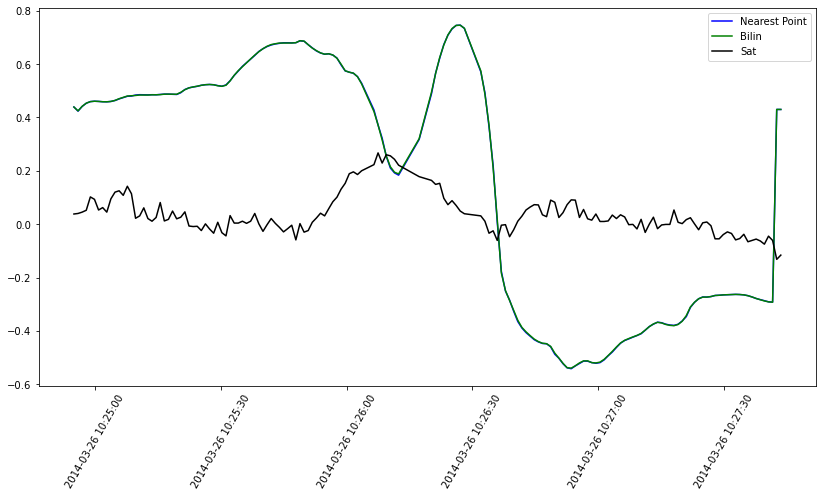

In [15]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

fig = plt.figure(num = 1, figsize=(12,7), facecolor='w', edgecolor='k')
ax = plt.axes([0.07, 0.24, 0.9, 0.75])
plt.plot(Solution0.time,Solution0.ssh_mod_np,'b',label='Nearest Point')
plt.plot(Solution0.time,Solution0.ssh_mod,'g',label='Bilin')
plt.plot(Solution0.time,Solution0.ssh_sat,'k', label='Sat')
plt.legend()
plt.xticks(rotation='60')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))


In [16]:
latminM=np.min(ModelGrid.lat.values)
latmaxM=np.max(ModelGrid.lat.values)
lonminM=np.min(ModelGrid.lon.values)
lonmaxM=np.max(ModelGrid.lon.values)

In [17]:
one_track=25

In [18]:
        jt1=SatelliteTrack.index_tracks[one_track][0]
        jt2=SatelliteTrack.index_tracks[one_track][1]

In [22]:
time=SatelliteTrack.time[jt1:jt2]

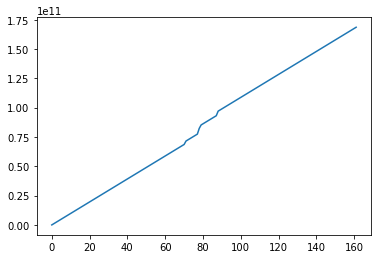

In [23]:
plt.plot(time-time[0])

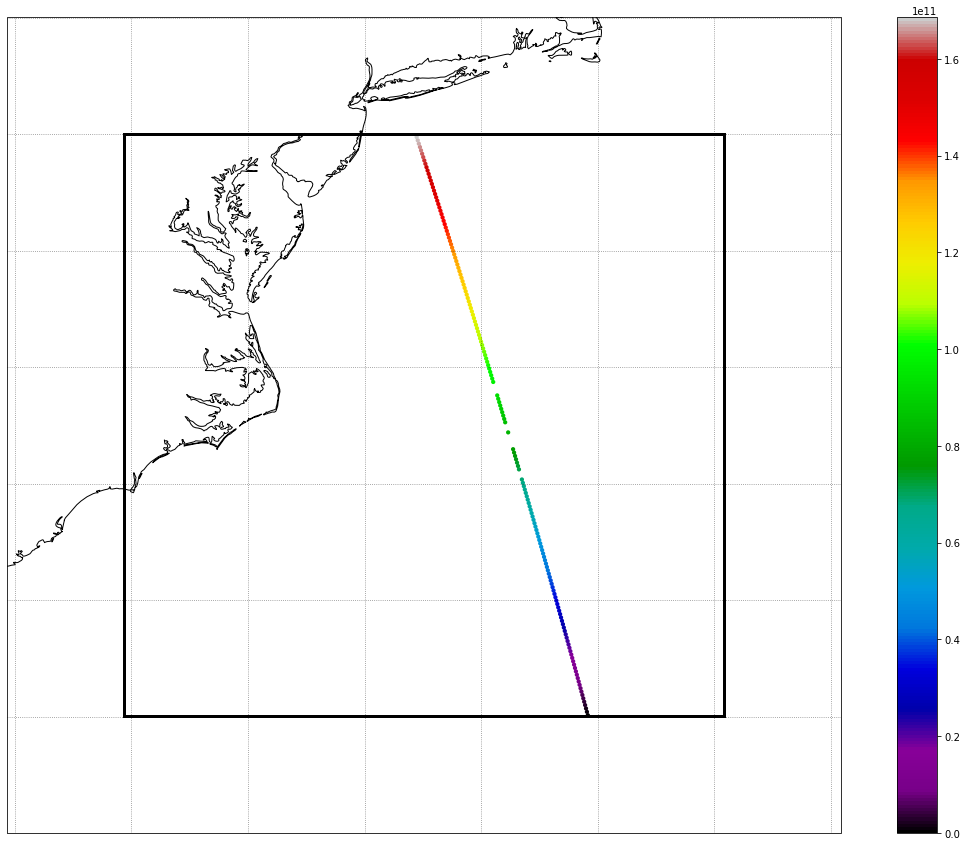

In [24]:
    import cartopy.crs as ccrs
    import cartopy.feature as cfeature
    from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

    fig=plt.figure(figsize=(20,15))
    ax = plt.subplot(111,projection=ccrs.PlateCarree(central_longitude=0))
    ax.set_extent((lonminM-2, lonmaxM+2, latminM-2, latmaxM+2))
    ax.coastlines(resolution="10m")
    gl = ax.gridlines(draw_labels=True, linestyle=':', color='black',
                              alpha=0.5)
    gl.top_labels = False
    gl.right_labels = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    ax.tick_params('both',labelsize=22)

    ax.plot([lonminM, lonminM], [latminM, latmaxM],color='black',linewidth=3,transform=ccrs.PlateCarree())
    ax.plot([lonmaxM, lonmaxM], [latminM, latmaxM],color='black',linewidth=3,transform=ccrs.PlateCarree())
    ax.plot([lonminM, lonmaxM], [latminM, latminM],color='black',linewidth=3,transform=ccrs.PlateCarree())
    ax.plot([lonminM, lonmaxM], [latmaxM, latmaxM],color='black',linewidth=3,transform=ccrs.PlateCarree())    

    plt.scatter(SatelliteTrack.lon[jt1:jt2],SatelliteTrack.lat[jt1:jt2], c=time-time[0],
                cmap='nipy_spectral',label='altika tracks', linewidth=0, s=18,
                transform=ccrs.PlateCarree(),zorder=1);
    plt.colorbar()


In [25]:
Solution0.XNPtrack

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [-100.0, -100.0, -100.0, ..., --, --, --],
        [-100.0, -100.0, -100.0, ..., --, --, --],
        [-100.0, -100.0, -100.0, ..., --, --, 161.0]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True, False]],
  fill_value=1e+20)

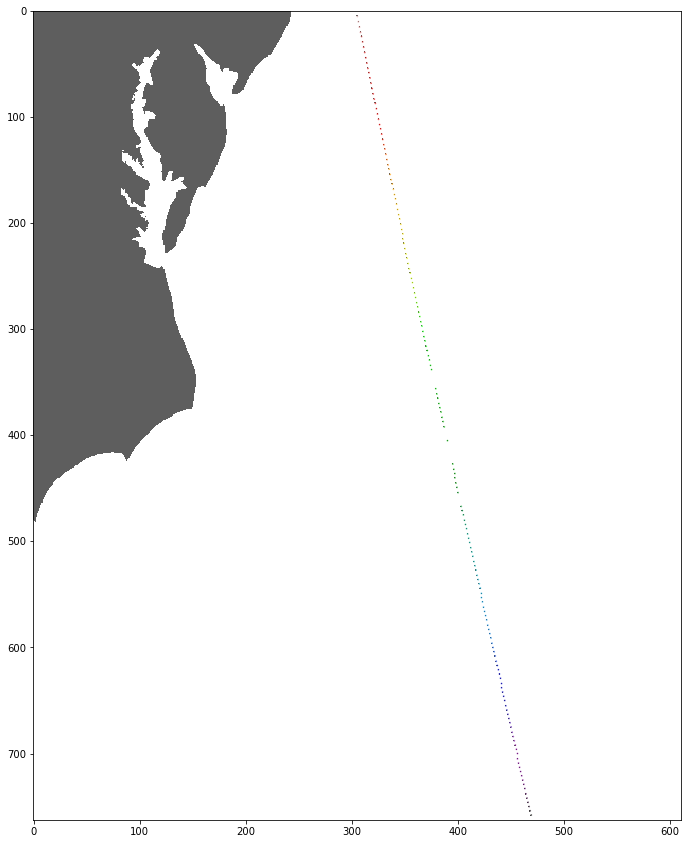

In [26]:
import numpy as nmp
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline

XFLD = nmp.flipud(Solution0.XNPtrack)
(idy,idx) = nmp.where( XFLD > 0 ) ; # that's track points...

XMSK = 1 - nmp.ma.getmask(XFLD).astype(nmp.int8)
pmsk = nmp.ma.masked_where(XMSK<0.1, XMSK*0.7)
del XMSK

(Nj,Ni) = XFLD.shape

fig = plt.figure(num = 1, figsize=(9,9*Nj/Ni), facecolor='w', edgecolor='k')
ax  = plt.axes([0., 0., 1., 1.],     facecolor = 'w')
norm_fld = colors.Normalize(vmin =nmp.amin(XFLD[(idy,idx)]), vmax=nmp.amax(XFLD[(idy,idx)]), clip = False)
cf = ax.scatter(idx, idy, c=XFLD[(idy,idx)], cmap = 'nipy_spectral', norm = norm_fld, alpha=0.5, marker='.', s=3 )
#
norm_lsm = colors.Normalize(vmin = 0., vmax = 1., clip = False)
cm = ax.imshow(pmsk, cmap='Greys', norm=norm_lsm, interpolation='none')

